In [1]:
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, recall_score

# Questions
### 1- How much total price for each category?
### 2- Last Purchase Date?
### 3- Most populat payment method?
### 4- How much total price for each Payment Method?
### 5- How does the price change over the months?
### 6- Churn Customer Prediction?

In [2]:
df = pd.read_csv('ecommerce_dataset_updated.csv')
df.head(10)

,User_ID,Product_ID,Category,Price (Rs.),Discount (%),Final_Price(Rs.),Payment_Method,Purchase_Date
0,337c166f,f414122f-e,Sports,36.53,15,31.05,Net Banking,12-11-2024
1,d38a19bf,fde50f9c-5,Clothing,232.79,20,186.23,Net Banking,09-02-2024
2,d7f5f0b0,0d96fc90-3,Sports,317.02,25,237.76,Credit Card,01-09-2024
3,395d4994,964fc44b-d,Toys,173.19,25,129.89,UPI,01-04-2024
4,a83c145c,d70e2fc6-e,Beauty,244.80,20,195.84,Net Banking,27-09-2024
5,3fdcdae8,0816ee12-5,Books,241.86,50,120.93,UPI,08-08-2024
6,12772337,d41e0b55-c,Toys,76.91,5,73.06,Credit Card,28-03-2024
7,9f0194af,83b7dc04-5,Sports,213.23,20,170.58,Net Banking,29-05-2024
8,7a8559d8,87c9c896-1,Sports,379.81,5,360.82,Credit Card,26-02-2024
9,8911f0d1,31308875-b,Home & Kitchen,415.36,50,207.68,Net Banking,11-01-2024


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3660 entries, 0 to 3659
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           3660 non-null   object 
 1   Product_ID        3660 non-null   object 
 2   Category          3660 non-null   object 
 3   Price (Rs.)       3660 non-null   float64
 4   Discount (%)      3660 non-null   int64  
 5   Final_Price(Rs.)  3660 non-null   float64
 6   Payment_Method    3660 non-null   object 
 7   Purchase_Date     3660 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 228.9+ KB


In [4]:
df.columns

Index(['User_ID', 'Product_ID', 'Category', 'Price (Rs.)', 'Discount (%)',
       'Final_Price(Rs.)', 'Payment_Method', 'Purchase_Date'],
      dtype='object')

In [5]:
df.columns = df.columns.str.replace(r"\s*\(.*?\)", "", regex=True)

In [6]:
df.columns

Index(['User_ID', 'Product_ID', 'Category', 'Price', 'Discount', 'Final_Price',
       'Payment_Method', 'Purchase_Date'],
      dtype='object')

In [7]:
df.describe()

,Price,Discount,Final_Price
count,3660.000000,3660.000000,3660.000000
mean,254.800675,18.825137,206.906579
std,141.682621,14.731338,122.687844
min,10.090000,0.000000,5.890000
25%,134.012500,5.000000,104.512500
50%,253.845000,15.000000,199.185000
75%,377.595000,25.000000,304.117500
max,499.960000,50.000000,496.820000


## Question1: How much total price for each category?

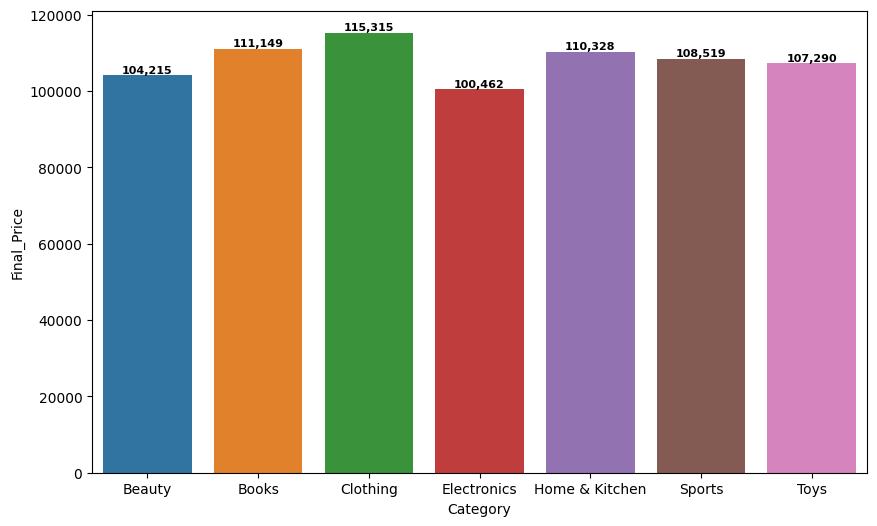

In [8]:
category = df.groupby("Category")['Final_Price'].sum().reset_index()
plt.figure(figsize=(10,6))
ax = sns.barplot(data=category, x='Category', y='Final_Price', hue="Category")
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}',
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=8, fontweight='bold', color='Black')

## Question2: Last Purchase Date?

In [9]:
df['Purchase_Date'] = pd.to_datetime(df['Purchase_Date'], format="%d-%m-%Y")

In [10]:
last_purchase = df['Purchase_Date'].max()
last_purchase

Timestamp('2024-11-21 00:00:00')

In [11]:
data = df.query('Purchase_Date == @last_purchase')
data['Payment_Method'].value_counts()

Cash on Delivery    4
Net Banking         4
Debit Card          3
Credit Card         2
Name: Payment_Method, dtype: int64

In [12]:
data['Category'].value_counts()

Home & Kitchen    3
Toys              3
Sports            2
Clothing          2
Electronics       2
Books             1
Name: Category, dtype: int64

## Question3: Most populat payment method?

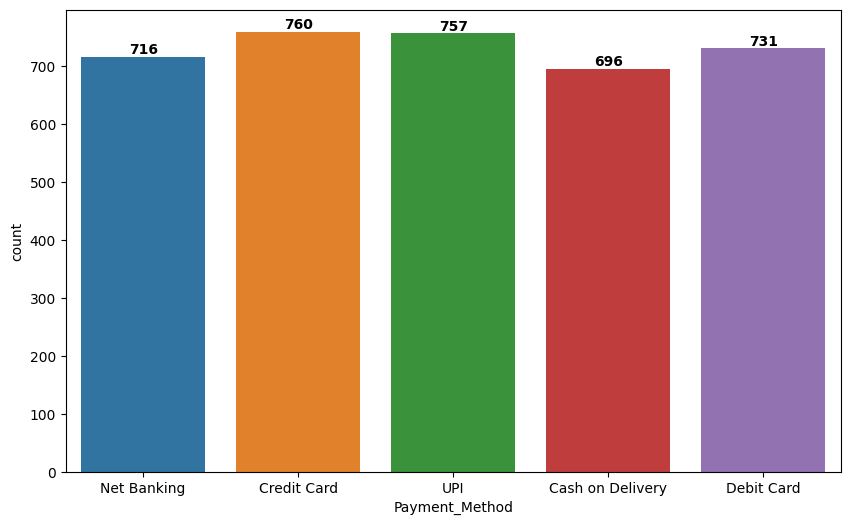

In [13]:
plt.figure(figsize=(10,6))
ax = sns.countplot(data=df, x='Payment_Method', hue="Payment_Method")
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}',
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10, fontweight='bold', color='Black')


## Question4: How much total price for each Payment Method?

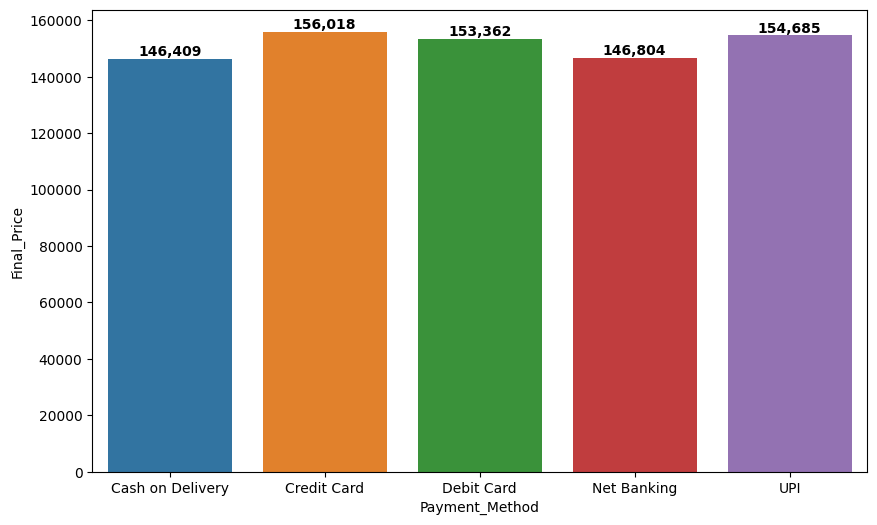

In [14]:
plt.figure(figsize=(10,6))
payment_method = df.groupby("Payment_Method")['Final_Price'].sum().reset_index()
ax = sns.barplot(data=payment_method, x='Payment_Method', y='Final_Price', hue='Payment_Method')
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}',
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10, fontweight='bold', color='Black')

## Question5: How does the price change over the months?

In [15]:
df["Month"] = df['Purchase_Date'].dt.month

In [16]:
df.head(1)

,User_ID,Product_ID,Category,Price,Discount,Final_Price,Payment_Method,Purchase_Date,Month
0,337c166f,f414122f-e,Sports,36.53,15,31.05,Net Banking,2024-11-12,11


In [17]:
month = df.groupby("Month")["Final_Price"].sum().reset_index()
month


,Month,Final_Price
0,1,69009.43
1,2,69186.34
2,3,71325.40
3,4,74365.13
4,5,68837.25
5,6,64256.66
6,7,72798.23
7,8,71506.96
8,9,68043.09
9,10,76034.51


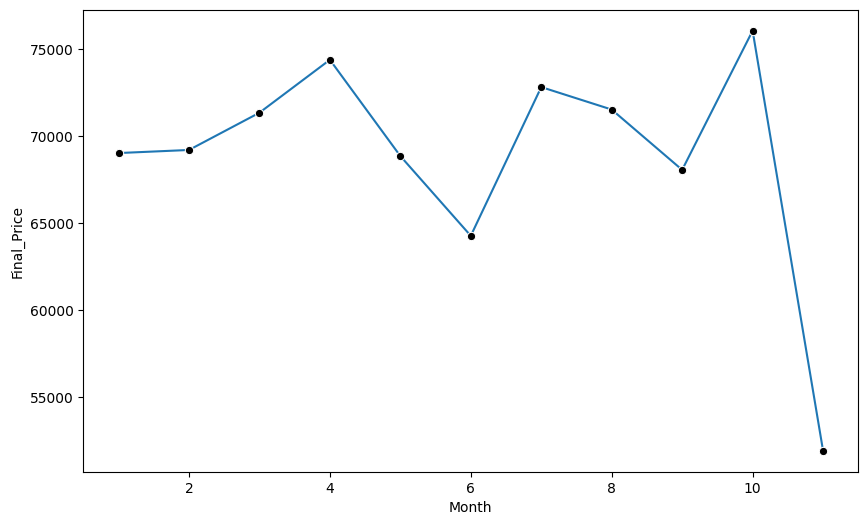

In [18]:
plt.figure(figsize=(10,6))
sns.lineplot(data=month, x="Month", y="Final_Price", marker='o', markerfacecolor='black');

## Question6: Churn Customer Prediction?

In [19]:
customer_data = df.groupby("User_ID").agg(
    Total_Orders=("Product_ID", "count"),
    Total_Spent=("Final_Price", "sum"),
    Last_Purchase_Date=("Purchase_Date", "max"),
    First_Purchase_Date=("Purchase_Date", "min"),
    Average_Order_Value=("Final_Price", "mean"),
    Unique_Categories=("Category", "nunique"),
).reset_index()

In [20]:
customer_data

,User_ID,Total_Orders,Total_Spent,Last_Purchase_Date,First_Purchase_Date,Average_Order_Value,Unique_Categories
0,001ae40d,1,345.93,2024-05-24,2024-05-24,345.93,1
1,00209791,1,10.32,2024-05-13,2024-05-13,10.32,1
2,0021e458,1,123.51,2024-01-19,2024-01-19,123.51,1
3,00333c7a,1,8.65,2024-05-07,2024-05-07,8.65,1
4,00390cf5,1,96.32,2024-07-10,2024-07-10,96.32,1
...,...,...,...,...,...,...,...
3655,ffb59cb8,1,417.36,2024-02-14,2024-02-14,417.36,1
3656,ffcf6748,1,135.23,2024-04-17,2024-04-17,135.23,1
3657,ffda329b,1,14.96,2024-05-01,2024-05-01,14.96,1
3658,ffda47ed,1,150.34,2024-04-04,2024-04-04,150.34,1


In [21]:
myDate = datetime.strptime("2024-12-25", "%Y-%m-%d")
customer_data["Days_Since_Last_Purchase"] = (myDate - customer_data["Last_Purchase_Date"]).dt.days

In [22]:
churn_threshold = 90
customer_data["Churn"] = np.where(customer_data["Days_Since_Last_Purchase"] > churn_threshold, 1, 0)
print(customer_data["Churn"].value_counts())

1    2998
0     662
Name: Churn, dtype: int64


In [23]:
x = customer_data.drop(["Churn", "User_ID","Last_Purchase_Date", "First_Purchase_Date"], axis=1)
y=customer_data['Churn']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [25]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [26]:
log_model = LogisticRegression()
log_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [27]:
y_pred_log = log_model.predict(X_test_scaled)

In [28]:
accuracy_score(y_test, y_pred_log)

0.9986338797814208

In [29]:
recall_score(y_test, y_pred_log)

1.0

In [30]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [31]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [32]:
y_pred_rf = rf_model.predict(X_test)
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       132
           1       1.00      1.00      1.00       600

    accuracy                           1.00       732
   macro avg       1.00      1.00      1.00       732
weighted avg       1.00      1.00      1.00       732



# Conclusions 
### 1- With a total revenue of 115,315, the clothing category leads in sales. This suggests high customer demand, frequent purchases, or relatively high-priced items.
### 2- The strong performance of books suggests a consistent customer base, possibly due to educational or entertainment needs.
### 3- Despite often being a high-ticket category, electronics (100,462) has the lowest revenue, This could mean fewer purchases due to higher prices, lower demand, or significant discounts reducing the total revenue.
### 4- Sports (108,519) and Toys (107,290) have close revenue figures, indicating steady interest in these categories, Seasonal trends might affect these sales, with spikes during holidays or back-to-school seasons.
### 5- With 760 transactions, credit cards lead slightly over other methods. This suggests that many customers prefer credit transactions, possibly due to convenience, rewards, or installment options.
### 6- UPI (757 transactions) is just behind credit cards, indicating that digital payments are widely used and trusted. This trend suggests customers prefer seamless, mobile-friendly transactions.
### 7- COD has 696 transactions, making it the least used method among these. This suggests that more customers are comfortable with digital transactions rather than paying in cash upon delivery. However, it still holds a significant share, indicating a portion of customers prefers not to pay online.
### 8- With a total revenue of 156,018, credit cards not only have the most transactions (760) but also contribute the highest revenue. This suggests that customers using credit cards tend to make higher-value purchases compared to other payment methods.
### 9- Cash on Delivery has the lowest revenue per transaction, which may indicate that COD users prefer lower-priced items or are hesitant to make large purchases.
### 10- The ranking of payment methods based on transaction count and total revenue is consistent.
### 11- Credit Card usage stands out as it has the highest revenue and transaction count, meaning credit card users are more likely to make higher-value purchases.
### 12- Cash on Delivery has the lowest transaction count and revenue, reinforcing that COD customers might be making smaller, less frequent purchases.
### 13- April (74,365.13) and October (76,034.51) show the highest total prices, indicating potential sales surges during these months, This could be due to holiday seasons, special discounts, or increased consumer demand.
### 14- June (64,256.66) and November (51,915.08) have the lowest final prices. The drop in June may be due to mid-year sales or lower demand, while the steep decline in November suggests post-sale season effects or high discount periods (e.g., Black Friday reducing final prices).
### 15- Out of 3,660 customers, 2,998 (≈82%) have churned (1), meaning they stopped making purchases. Only 662 customers (≈18%) are retained (0).
### 16-This high churn rate is a serious concern, as retaining customers is more cost-effective than acquiring new ones.
### 17- The business is losing a significant number of customers, indicating potential issues like:
   #### Lack of customer engagement.
   #### Poor post-purchase experience.
   #### Weak loyalty programs.
   #### High competition driving customers away.



# Possible Business Insights
### 1-If the goal is to increase revenue, electronics might need better promotions, marketing, or pricing strategies to attract more customers.
### 2-Clothing and books are strong performers, so maintaining stock availability and competitive pricing could sustain growth.
### 3-Seasonal analysis could help understand if these revenue numbers fluctuate over time and how to optimize sales strategies.
### 4- For Credit Card Usage:
##### 4(1)-Offer Exclusive Discounts & Rewards => Provide cashback, reward points, or discounts for customers using credit cards.
##### 4(2)-Installment Plans => Introduce EMI (Equated Monthly Installment) options to encourage high-value purchases.
##### 4(3)-Ensure Secure Transactions => Improve trust by emphasizing security features (OTP verification, fraud protection).
##### 4(4)-Bank Partnerships => Collaborate with banks to offer special promotions (e.g., 5% off on selected banks).
### 5-For Cash on Delivery Usage:
##### 5(1)-Reduce COD Fees => If COD has additional charges, lowering or eliminating them could encourage more usage.
##### 5(2)-Provide Faster Delivery for COD Orders => Customers may choose COD if they trust quicker delivery services.
##### 5(3)-Encourage Digital Payment at Delivery => Offer UPI-based payments even at the time of delivery to make it more flexible.
##### 5(4)-Cashback on First Online Payment => If COD users shift to online payments, offer a small cashback as an incentive.
### 6- Encourage Credit Card Spending on High-Value Purchases,Offer exclusive high-value product discounts for credit card users, Provide EMI and interest-free installment plans for expensive items and Increase reward points or cashback offers to attract more high-spending customers.
### 7-Boost Cash on Delivery Revenue, Encourage larger COD orders by offering free shipping above a certain amount.Allow digital payment at the time of delivery (UPI, card swiping) to convert COD users into online payers.Provide first-time online payment discounts for customers who usually choose COD.
### 8- Understand the Demand Cycles as Analyze what drives the peaks in April and October (festivals, holidays, or promotions).Identify why November sees a steep decline—is it due to extreme discounts or reduced spending post-sales?
### 9- Leverage High-Revenue Months as Plan strategic marketing campaigns before high-revenue months to boost profits.Consider introducing limited-time premium products or bundles during these periods.
### 10- Improve Sales in Low-Revenue Months as Offer targeted promotions in June and November to maintain steady revenue. Introduce personalized recommendations and loyalty rewards to encourage spending.
### 11- Stabilize Prices with Smarter Discounting Instead of deep price cuts in November, offer value-based promotions (e.g., free shipping, cashback).Use dynamic pricing strategies to optimize discounts without hurting overall revenue.
### 12- Analyze Churned Customers’ Behavior Identify why customers are leaving (e.g., time since last purchase, drop in spending). Use customer segmentation to target at-risk customers with personalized offers.
### 13- Offer Loyalty & Retention Programs Introduce discounts, cashback, or exclusive deals for returning customers.Implement a loyalty program with reward points for frequent purchases.
### 14-Improve Customer Engagement Send personalized emails, product recommendations, or reminders to inactive customers.Use AI-driven recommendations based on previous purchases to boost interest.
### 15-Enhance Post-Purchase Experience Improve customer support, return policies, and delivery experience to boost satisfaction.Collect customer feedback to understand pain points and make improvements.
### 16-Win Back Churned Customers Offer "We Miss You" promotions with special discounts for customers who haven’t purchased in a while. Send targeted offers before expected churn time (e.g., if a customer typically buys every 2 months but hasn’t returned in 3).